In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("../data/misgrosi_job.csv")
df_density = pd.read_csv('../../density.csv')

In [2]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df['Stadt'] = df.apply(stadt, axis=1)
df.head()

,Position,Company,Location,Job Type,Stadt
0,"Wir suchen ein zusätzliches Grosi, das uns vor...",Daniela1984,3114 Wichtra,Kinderbetreuung allgemein,Wichtra
1,Suchen liebevolles Grosi für langfristige Betr...,Hendrik,3037 Herrenschwanden,Tages-Grosi,Herrenschwanden
2,Liebe Betreuung gesucht in Rorbas\nFamiliebuehrer,Familiebuehrer,8427 Rorbas,Grosi & Opi,Rorbas
3,Grosi gesucht im Entlebuch\nMamimitHerz,MamimitHerz,6162 Entlebu,Grosi als Nanny/Haushaltshilfe,Entlebu
4,Grosi gesucht für Kinderbetreuung in La Neuvev...,Sina 88,2520 La Neuvevill,Babysitting,None


In [3]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df['Post Code'] = df.apply(post, axis=1)

In [4]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,1794.0,1
1,2000.0,2
2,2502.0,2
3,2503.0,2
4,2504.0,1
...,...,...
573,9642.0,1
574,60005.0,1
575,75059.0,1
576,79541.0,1


In [5]:
# Merge grouped by data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,Unnamed: 0,City,Region,Area,Population,Density,gig_per,urban
0,1794.0,1,569.0,NaN,Canton of Fribourg,3.795,677.0,178.392622,0.147710,rural
1,2000.0,2,764.0,Neuchâtel,Canton of Neuchâtel,31.600,33200.0,1050.632911,0.006024,urban
2,2502.0,2,938.0,NaN,Canton of Bern,6.400,17803.0,2781.718750,0.011234,urban center
3,2503.0,2,939.0,NaN,Canton of Bern,2.954,18295.0,6193.297224,0.010932,urban center
4,2504.0,1,940.0,NaN,Canton of Bern,9.700,17751.0,1830.000000,0.005633,urban center


In [6]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural           203
urban           244
urban center    121
Name: urban, dtype: int64

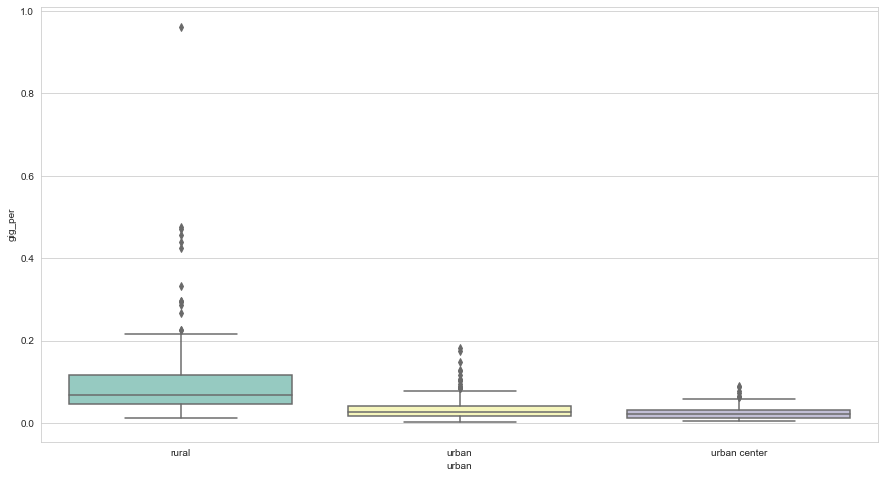

In [7]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3")

In [8]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']

In [9]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 20)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

In [10]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 25, label = labels, range = [0,0.75])
    plt.xlabel('percentage of gig workers')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

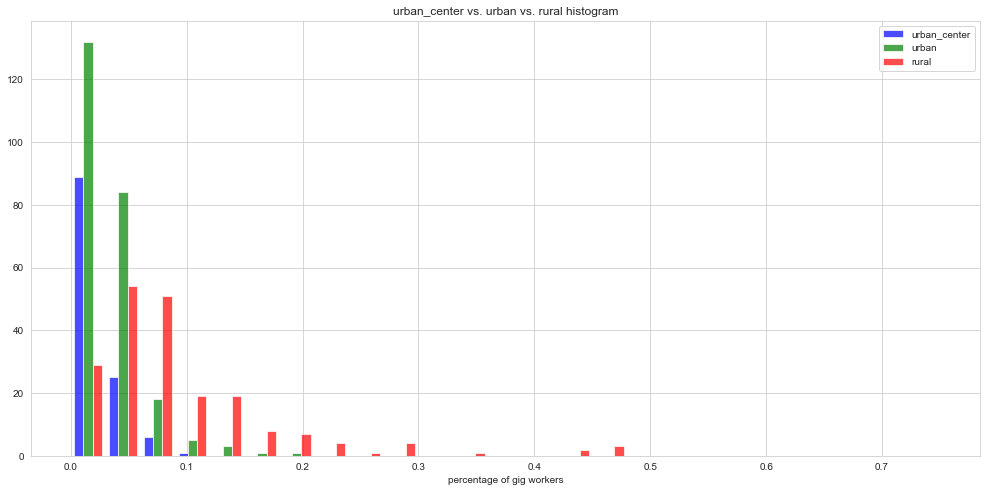

In [11]:
hist_all(['urban_center','urban','rural'],urban_center,urban,rural)

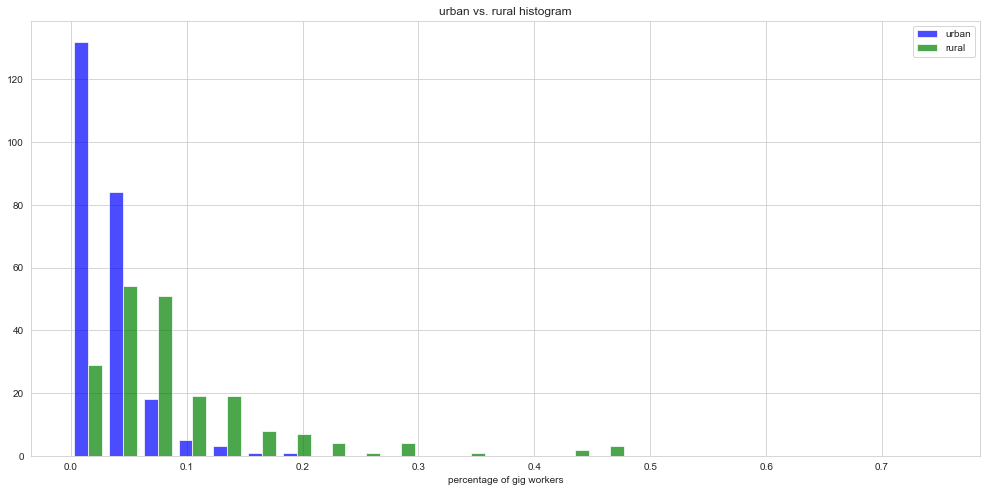

In [12]:
hist_all(['urban','rural'],urban,rural)

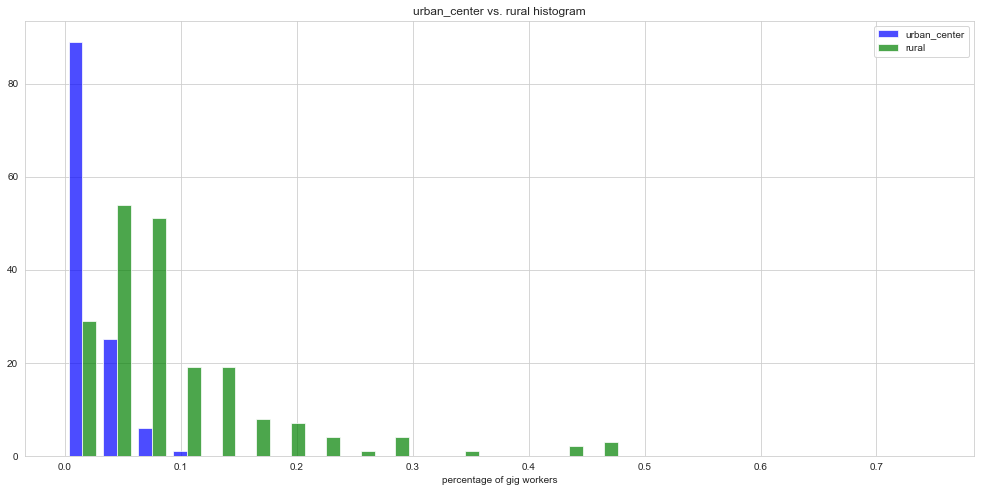

In [13]:
hist_all(['urban_center','rural'],urban_center,rural)

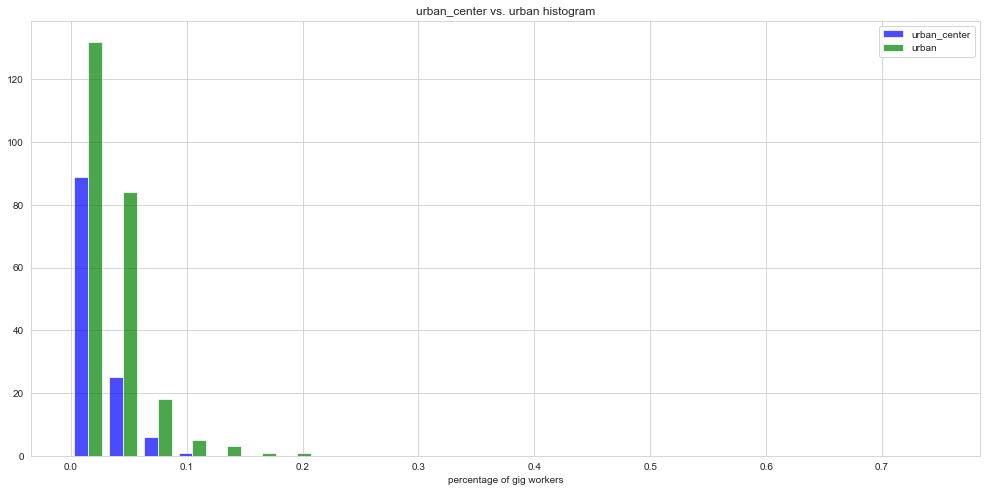

In [14]:
hist_all(['urban_center','urban'],urban_center,urban)

In [15]:
df_count = df_density.merge(df_count,on = 'Post Code', how = 'left')
df_count['Counts'] = df_count['Counts'].fillna(0)
df_count = df_count.drop(['City','Region'],axis=1)
df_count = df_count.dropna(subset = ['Density','Population'])
df_count['gig_per'] = 100*df_count['Counts']/df_count['Population']
df_count = df_count.rename(columns={'Counts': 'gig_num'})
df_count

,Unnamed: 0,Post Code,Area,Population,Density,gig_num,gig_per
0,0,1000,14.100,4072.0,288.794326,0.0,0.0
3,3,1003,0.820,6707.0,8179.268293,0.0,0.0
4,4,1004,2.272,31230.0,13745.598592,0.0,0.0
5,5,1005,1.585,12386.0,7814.511041,0.0,0.0
6,6,1006,1.553,15391.0,9910.495815,0.0,0.0
...,...,...,...,...,...,...,...
3517,3517,9411,5.100,701.0,137.450980,0.0,0.0
3519,3519,9426,1.381,931.0,674.149167,0.0,0.0
3520,3520,9427,6.900,1846.0,267.536232,0.0,0.0
3521,3521,9428,7.000,1995.0,285.000000,0.0,0.0


In [16]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title(yv+" vs. "+xv)
    ax.set_xlabel(xv)

In [17]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(df[col1], df[col2])
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: -0.244713560924532, p value: 3.4329230708659857e-09
Spearman rho: -0.6375589228499697, p value: 3.996049566352564e-66
kendall tau: -0.4573582750951683, p value: 1.0077667994091634e-59


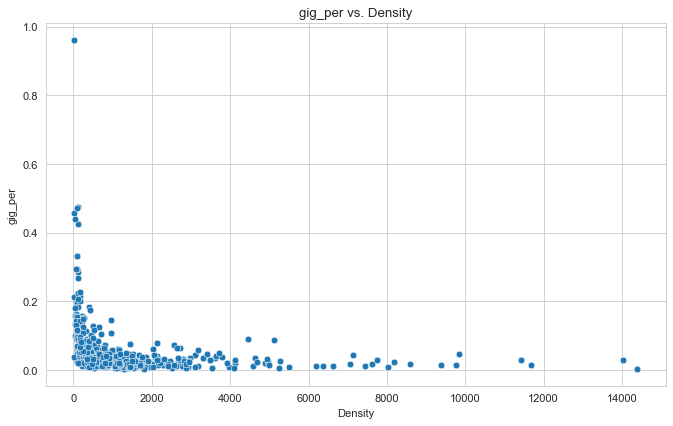

In [18]:
draw_corr(df,'Density','gig_per')

pearson r: 0.022413600441005807, p value: 0.20644573317216852
Spearman rho: 0.3849999389791986, p value: 7.687402019665378e-113
kendall tau: 0.2920756605886602, p value: 9.319804595486686e-99


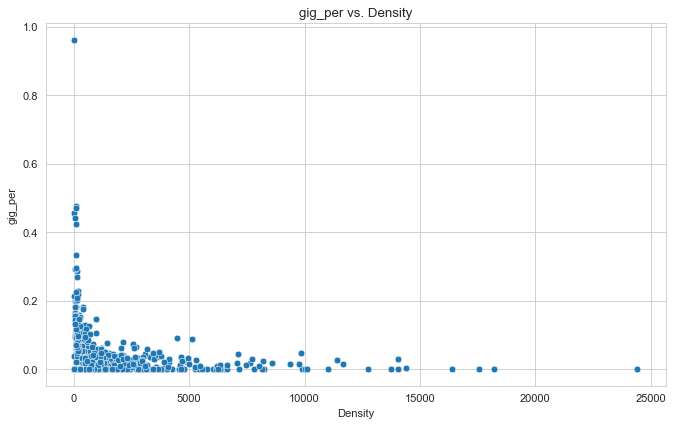

In [19]:
draw_corr(df_count,'Density','gig_per')